In [1]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMAGE_PATH = 'aadhar2.jpg'

In [3]:
def sharpen_image(image):
    # Create a sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    # Apply the sharpening kernel to the image
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image


In [4]:
reader = easyocr.Reader(['en'])
result = reader.readtext(IMAGE_PATH)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[307, 33], [458, 33], [458, 61], [307, 61]], 'HRa HGT', 0.2511582333876433),
 ([[260, 68], [506, 68], [506, 96], [260, 96]],
  'Government of India',
  0.8446644341095731),
 ([[224, 106], [365, 106], [365, 143], [224, 143]],
  'HEH< %WT',
  0.01140366491672562),
 ([[226, 140], [452, 140], [452, 172], [226, 172]],
  'Muhammad Irfan',
  0.9415711240675502),
 ([[224, 182], [280, 182], [280, 206], [224, 206]], 'T', 0.36424693761824756),
 ([[279, 173], [355, 173], [355, 209], [279, 209]], 'TRg', 0.5327264370319916),
 ([[381, 175], [615, 175], [615, 211], [381, 211]],
  'DOB: 10/10/1998',
  0.6087253814553618),
 ([[222, 220], [284, 220], [284, 258], [222, 258]], '5w', 0.22741606638211842),
 ([[318, 220], [386, 220], [386, 250], [318, 250]],
  'Male',
  0.5738916127072021),
 ([[237, 363], [533, 363], [533, 405], [237, 405]],
  '5896 4780 3695',
  0.6571746754007832),
 ([[41, 416], [178, 416], [178, 468], [41, 468]], 'HTUT', 0.1269012987613678),
 ([[225, 408], [723, 408], [723, 474], [225, 

In [5]:
detected_text_list = []
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

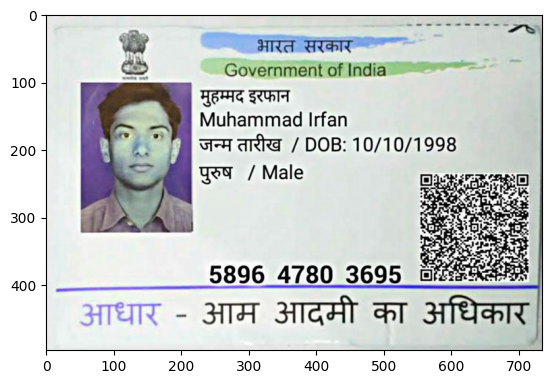

In [6]:
img = cv2.imread(IMAGE_PATH)
#img= sharpen_image(image)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    #img= cv2.rectangle(img, tuple(top_left), tuple(bottom_right), (0, 255, 0), 2)
    #img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(850,spacer), font, 0.5,(0,0,0),1,cv2.LINE_AA)
    detected_text_list.append(text)
    spacer+=20
    
plt.imshow(img)
plt.show()

In [7]:
detected_text_list

['HRa HGT',
 'Government of India',
 'HEH< %WT',
 'Muhammad Irfan',
 'T',
 'TRg',
 'DOB: 10/10/1998',
 '5w',
 'Male',
 '5896 4780 3695',
 'HTUT',
 '31H  31d &T 3f447']

In [18]:
for i in range(len(detected_text_list)):
    print(detected_text_list[i])

HRa HGT
Government of India
HEH< %WT
Muhammad Irfan
T
TRg
DOB: 10/10/1998
5w
Male
5896 4780 3695
HTUT
31H  31d &T 3f447


In [55]:
import re
aadhar_pattern = re.compile(r'\b\d{4} \d{4} \d{4}\b')
for i in range(len(detected_text_list)):
    #print(detected_text_list[i])
    regex_aadhaar_numbers = re.findall(aadhar_pattern,detected_text_list[i])
    if regex_aadhaar_numbers:
        regex_aadhaar_number = regex_aadhaar_numbers[0]
        print("Found Aadhar card number:", regex_aadhaar_number)
    #else:
        #print("No Aadhar card number found.")

Found Aadhar card number: 5896 4780 3695


In [51]:
 regex_aadhaar_numbers

[]

In [43]:
if regex_aadhaar_numbers:
    regex_aadhaar_number = regex_aadhaar_numbers[0]
    print("Found Aadhar card number:", regex_aadhaar_number)
else:
    print("No Aadhar card number found.")

No Aadhar card number found.


In [15]:
print(str(detected_text_list))


['HRa HGT', 'Government of India', 'HEH< %WT', 'Muhammad Irfan', 'T', 'TRg', 'DOB: 10/10/1998', '5w', 'Male', '5896 4780 3695', 'HTUT', '31H  31d &T 3f447']


In [19]:
def print_details():
    for i in range(len(detected_text_list)):
        if "Name" in detected_text_list[i]:
            print(detected_text_list[i])
        elif "DOB" in detected_text_list[i]:
            print(detected_text_list[i])
        elif "Gender" in detected_text_list[i]:
            print(detected_text_list[i])
        '''else:
            print(detected_text_list)
            break'''

    print(detected_text_list[len(detected_text_list)-2])


In [10]:
print_details()

DOB: 10/10/1998
HTUT


In [ ]:
file_path = 'detected_text.txt'
with open(file_path, 'w') as file:
    for text in detected_text:
        file.write(text + '\n')
print(f"Detected text saved to '{file_path}'.")

NameError: name 'detected_text' is not defined